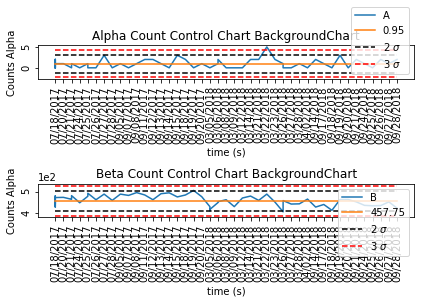

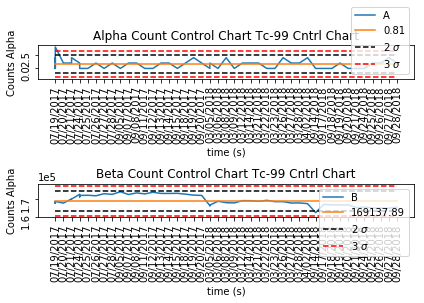

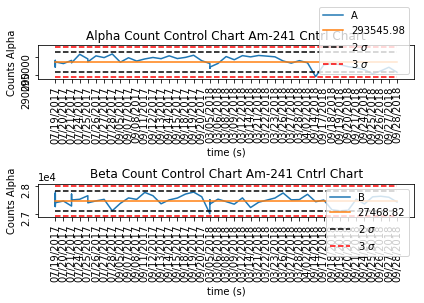

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def run_report(fle_name):
    # PICCNT1.CSV is background check
    # PICCNT2.CSV is beta source check with Tc-99
    
    df = pd.read_csv(fle_name, header=1)
    ttle = pd.read_csv(fle_name, header=None).loc[0][7]
    fig, ax1 = plt.subplots(2,1)
    ax1[0].set_xlabel('time (s)')
    ax1[0].set_ylabel('Counts Alpha')
    ax1[0].plot(df["DATE"], df["A"])
    lbl_mean = str(np.round(df["A"].mean()*100)/100)
    ax1[0].plot(df["DATE"], df["A"].mean() * np.ones(len(df["A"])), label=lbl_mean)
    ax1[0].plot(df["DATE"], df["A"].mean() + 2* np.sqrt(df["A"].var()) * np.ones(len(df["A"])), 'k--', 
               label='2 $\sigma$')
    ax1[0].plot(df["DATE"], df["A"].mean() - 2* np.sqrt(df["A"].var()) * np.ones(len(df["A"])), 'k--')
    ax1[0].plot(df["DATE"], df["A"].mean() + 3* np.sqrt(df["A"].var()) * np.ones(len(df["A"])), 'r--', 
               label='3 $\sigma$')
    ax1[0].plot(df["DATE"], df["A"].mean() - 3* np.sqrt(df["A"].var()) * np.ones(len(df["A"])), 'r--')
    ax1[0].tick_params(axis='y')
    ax1[0].tick_params(labelrotation=90)
    ax1[0].set_title('Alpha Count Control Chart ' + ttle)
    ax1[0].legend()
    
    ax1[1].set_xlabel('time (s)')
    ax1[1].set_ylabel('Counts Alpha')
    ax1[1].plot(df["DATE"], df["B"])
    lbl_mean = str(np.round(df["B"].mean()*100)/100)
    ax1[1].plot(df["DATE"], df["B"].mean() * np.ones(len(df["B"])), label=lbl_mean)
    
    ax1[1].plot(df["DATE"], df["B"].mean() + 2*np.sqrt( df["B"].var()) * np.ones(len(df["B"])), 'k--', 
                label='2 $\sigma$')
    ax1[1].plot(df["DATE"], df["B"].mean() - 2*np.sqrt( df["B"].var()) * np.ones(len(df["B"])), 'k--')
    ax1[1].plot(df["DATE"], df["B"].mean() + 3* np.sqrt(df["B"].var()) * np.ones(len(df["B"])), 'r--',
                label='3 $\sigma$')
    ax1[1].plot(df["DATE"], df["B"].mean() - 3* np.sqrt(df["B"].var()) * np.ones(len(df["B"])), 'r--')
    ax1[1].tick_params(axis='y')
    ax1[1].tick_params(labelrotation=90)
    ax1[1].set_title('Beta Count Control Chart ' + ttle)
    ax1[1].ticklabel_format(axis='y', scilimits=(0,0))
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    ax1[1].legend()
    plt.show()
    
#Begin processing    
fle_name = [r'M:\radcon\RAL\Protean\PICCNT1.CSV', #Background
            r'M:\radcon\RAL\Protean\PICCNT2.CSV', #Tc-99
            r'M:\radcon\RAL\Protean\PICCNT3.CSV', #Am-241
            #r'M:\radcon\RAL\Protean\PICCNT4.CSV'
           ] #None

for i in fle_name:
    run_report(i)
    

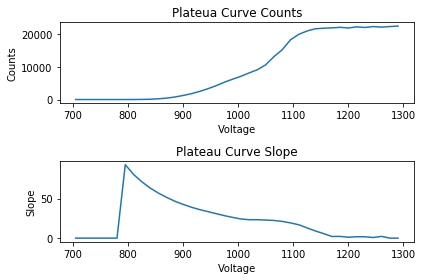

In [2]:
fle_name = r'M:\radcon\RAL\Protean\PICPLAT.CSV'
df = pd.read_csv(fle_name, header=1)
df
fig, ax1 = plt.subplots(2,1)
ax1[0].set_xlabel('Voltage')
ax1[0].set_ylabel('Counts')
ax1[0].plot(df["VOLTS"], df["COUNTS"])
ax1[0].set_title('Plateua Curve Counts')
ax1[1].set_xlabel('Voltage')
ax1[1].set_ylabel('Slope')
ax1[1].plot(df["VOLTS"], df["SLOPE"])
ax1[1].set_title('Plateau Curve Slope')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [3]:
fle_name = r'M:\radcon\RAL\Protean\2018_Q3_Source Leak Tests.csv'
df0 = pd.read_csv(fle_name, header=1)
df = df0.loc[:, ['SAMPLE_ID', 'PROGRAM_NAME', 'DATE', 'TIME', 'ADPM', 'BDPM', 'A', 'B', 
           'CNT_TIME','AEFF', 'BEFF', "ABKGCPM", 'BBKGCPM', 'A_MDA', 'B_MDA','BG_TIME' ]]

df['BLC_DPM'] = 1.645* 100 / df['BEFF'] * np.sqrt( df['BBKGCPM']* (1 /df['CNT_TIME'] + 1/df['BG_TIME']))
df['BLD_DPM'] = 2.71 * 100/ (df['BEFF'] * df['CNT_TIME']) + 2*df['BLC_DPM']

df['ALC_DPM'] = 1.645* 100 / df['AEFF'] * np.sqrt(2 * df['ABKGCPM']*(1 /df['CNT_TIME']+ 1/df['BG_TIME']) )
df['ALD_DPM'] = 2.71 * 100/ (df['AEFF'] * df['CNT_TIME']) + 2*df['ALC_DPM']
df

,SAMPLE_ID,PROGRAM_NAME,DATE,TIME,ADPM,BDPM,A,B,CNT_TIME,AEFF,BEFF,ABKGCPM,BBKGCPM,A_MDA,B_MDA,BG_TIME,BLC_DPM,BLD_DPM,ALC_DPM,ALD_DPM
0,Leak Test #135,Gross Alpha Beta,09/25/18,11:41:50,-0.25,-22.72,0.0,425.0,10.0,27.62,15.95,0.07,46.13,9.009000e-07,0.000021,200.0,22.698209,47.095478,0.722106,2.425385
1,Leak Test #311,Gross Alpha Beta,09/25/18,12:31:37,-0.25,-5.16,0.0,453.0,10.0,27.62,15.95,0.07,46.13,9.009000e-07,0.000021,200.0,22.698209,47.095478,0.722106,2.425385
2,Leak Test #79&113,Gross Alpha Beta,09/25/18,12:44:39,0.11,-9.61,1.0,446.0,10.0,27.62,15.95,0.07,46.13,9.009000e-07,0.000021,200.0,22.698209,47.095478,0.722106,2.425385
3,Leak Test #312,Gross Alpha Beta,09/25/18,12:54:57,-0.25,-7.67,0.0,449.0,10.0,27.62,15.95,0.07,46.13,9.009000e-07,0.000021,200.0,22.698209,47.095478,0.722106,2.425385
4,Leak Test #241,Gross Alpha Beta,09/25/18,13:29:50,-0.25,-13.32,0.0,440.0,10.0,27.62,15.95,0.07,46.13,9.009000e-07,0.000021,200.0,22.698209,47.095478,0.722106,2.425385
5,Leak Test #346,Gross Alpha Beta,09/25/18,13:40:02,-0.25,-18.96,0.0,431.0,10.0,27.62,15.95,0.07,46.13,9.009000e-07,0.000021,200.0,22.698209,47.095478,0.722106,2.425385
6,Leak Test #347A-347J,Gross Alpha Beta,09/25/18,13:50:46,0.11,-39.71,1.0,398.0,10.0,27.62,15.95,0.07,46.13,9.009000e-07,0.000021,200.0,22.698209,47.095478,0.722106,2.425385
7,Leak Test #115,Gross Alpha Beta,09/25/18,14:03:27,-0.25,-20.22,0.0,429.0,10.0,27.62,15.95,0.07,46.13,9.009000e-07,0.000021,200.0,22.698209,47.095478,0.722106,2.425385
8,Leak Test #242,Gross Alpha Beta,09/25/18,15:36:22,0.47,-10.30,2.0,445.0,10.0,27.62,15.95,0.07,46.13,9.009000e-07,0.000021,200.0,22.698209,47.095478,0.722106,2.425385
9,Leak Test #351,Gross Alpha Beta,09/25/18,15:48:18,-0.25,-34.01,0.0,407.0,10.0,27.62,15.95,0.07,46.13,9.009000e-07,0.000021,200.0,22.698209,47.095478,0.722106,2.425385


In [4]:
df.dropna()
df.loc[df['BDPM']>=df['BLC_DPM'] , ('SAMPLE_ID', 'BDPM', 'B_MDA')]

,SAMPLE_ID,BDPM,B_MDA


In [5]:
df0

,SN,REPEAT,PROGRAM_NUM,PROGRAM_NAME,SAMPLE_ID,DATE,TIME,WT,WT_SD,BG_TIME,...,INSTR_ID,COMMENT,USER1,USER2,USER3,USER4,USER5,USER6,MESSAGE1,MESSAGE2
0,181,0,1.0,Gross Alpha Beta,Leak Test #135,09/25/18,11:41:50,0.0,0.0,200.0,...,PIC MPC-2000BDP Instr No 1,NaN,181,Leak Test #135,0.005,0.005,0.0,-0.20,Less Than MDA,Less Than MDA
1,182,0,1.0,Gross Alpha Beta,Leak Test #311,09/25/18,12:31:37,0.0,0.0,200.0,...,PIC MPC-2000BDP Instr No 1,NaN,182,Leak Test #311,0.005,0.005,0.0,-0.05,Less Than MDA,Less Than MDA
2,183,0,1.0,Gross Alpha Beta,Leak Test #79&113,09/25/18,12:44:39,0.0,0.0,200.0,...,PIC MPC-2000BDP Instr No 1,NaN,183,Leak Test #79&113,0.005,0.005,0.0,-0.09,Less Than MDA,Less Than MDA
3,184,0,1.0,Gross Alpha Beta,Leak Test #312,09/25/18,12:54:57,0.0,0.0,200.0,...,PIC MPC-2000BDP Instr No 1,NaN,184,Leak Test #312,0.005,0.005,0.0,-0.07,Less Than MDA,Less Than MDA
4,185,0,1.0,Gross Alpha Beta,Leak Test #241,09/25/18,13:29:50,0.0,0.0,200.0,...,PIC MPC-2000BDP Instr No 1,NaN,185,Leak Test #241,0.005,0.005,0.0,-0.12,Less Than MDA,Less Than MDA
5,186,0,1.0,Gross Alpha Beta,Leak Test #346,09/25/18,13:40:02,0.0,0.0,200.0,...,PIC MPC-2000BDP Instr No 1,NaN,186,Leak Test #346,0.005,0.005,0.0,-0.17,Less Than MDA,Less Than MDA
6,187,0,1.0,Gross Alpha Beta,Leak Test #347A-347J,09/25/18,13:50:46,0.0,0.0,200.0,...,PIC MPC-2000BDP Instr No 1,NaN,187,Leak Test #347A-347J,0.005,0.005,0.0,-0.36,Less Than MDA,Less Than MDA
7,188,0,1.0,Gross Alpha Beta,Leak Test #115,09/25/18,14:03:27,0.0,0.0,200.0,...,PIC MPC-2000BDP Instr No 1,NaN,188,Leak Test #115,0.005,0.005,0.0,-0.18,Less Than MDA,Less Than MDA
8,189,0,1.0,Gross Alpha Beta,Leak Test #242,09/25/18,15:36:22,0.0,0.0,200.0,...,PIC MPC-2000BDP Instr No 1,NaN,189,Leak Test #242,0.005,0.005,0.0,-0.09,Less Than MDA,Less Than MDA
9,190,0,1.0,Gross Alpha Beta,Leak Test #351,09/25/18,15:48:18,0.0,0.0,200.0,...,PIC MPC-2000BDP Instr No 1,NaN,190,Leak Test #351,0.005,0.005,0.0,-0.31,Less Than MDA,Less Than MDA
